# The Sparks Foundation #GRIPAPR2021

## Task 3: Exploratory Data Analysis - Retail
By:
    Shubham Kamble

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("SampleSuperstore.csv")

In [28]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [29]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


### Conclusions:   
    There are total 13 columns. 
    
    Most of the columns contain categorical data
    
    No null values in the dataset

In [31]:
#Total view of the data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [32]:
#Check Null Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values or misssing values in the dataset

In [33]:
#Check Datatypes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Most of the columns contain Categorical data

In [34]:
df.duplicated().sum()

17

Contain 17 duplicated values

In [35]:
#Remove duplicated values from dataset and check shape of dataset again
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

Now we have 9977 rows and 13 columns

In [36]:
df["Country"].unique()

array(['United States'], dtype=object)

"Country" column in dataframe has only one value.So Country and "Postal code" Columns ae not important. So we will drop them

In [37]:
df.drop(columns=["Country","Postal Code"],axis=1,inplace=True)
df.shape

(9977, 11)

Text(0.5, 1, 'Correlation Heatmap')

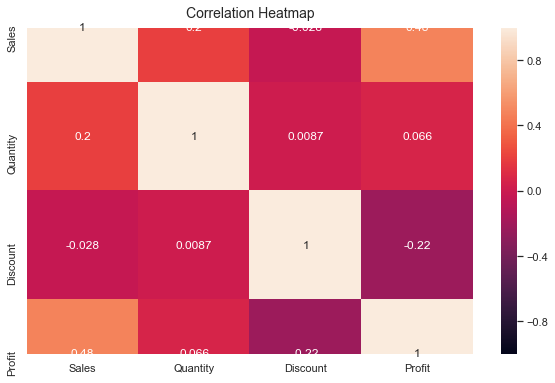

In [38]:
plt.figure(figsize=[10,6])
heatmap=sns.heatmap(df.corr(method="pearson"),vmin=-1,vmax=1,annot=True)
heatmap.set_title("Correlation Heatmap",fontdict={"fontsize":14},pad=10)

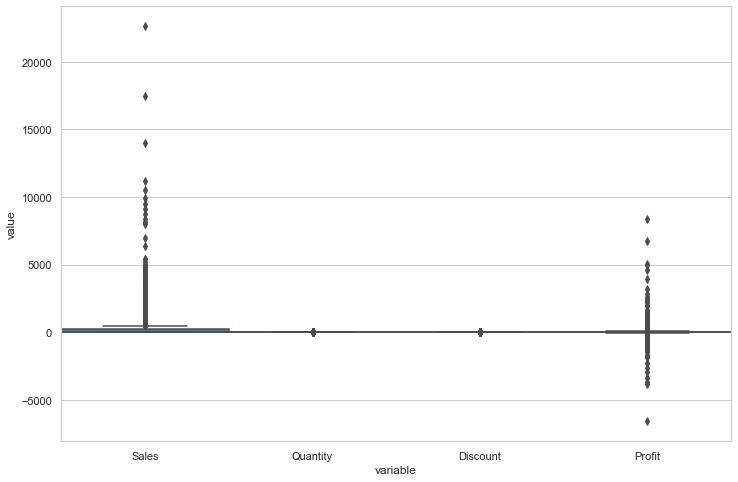

In [39]:
#Select numeric datatypes columns
num_col=["Sales","Quantity","Discount","Profit"]

#Detect outliers using Boxplot
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable",y="value",data=pd.melt(df[num_col]),width=1)
plt.show()

Sales and Profit are large Datset so outliers there can clearly seen. Now we will remove outliers rows to improve dataset

In [40]:
#Removal of outliers
np.percentile(df["Sales"],75)
#iqr=q75-q25
#iqr


209.97

In [41]:
def remove_outlier(dataset,k=3):
    for col in num_col:
        global ds
        mean=df[col].mean()
        std=df[col].std()
        outlier=[i for i in df[col] if i>mean-k*std]
        outlier=[i for i in df[col] if i<mean-k*std]
        ds=df.loc[df[col].isin(outlier)]                      

In [42]:
remove_outlier(df,k=3)

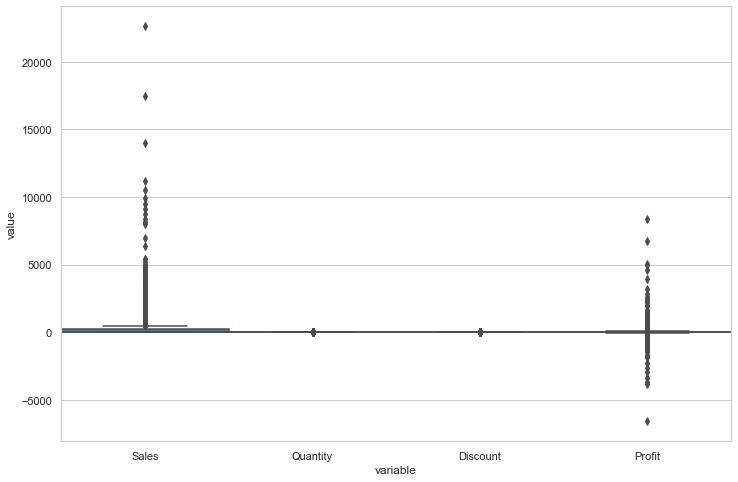

In [43]:
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable",y="value",data=pd.melt(df[num_col]),width=1)
plt.show()

Exploratory Analysis and Visualisation

In [44]:
#Printing unique entries in Categorical Data
for col in df.columns:
    if df[col].dtype=='object':
        print("Number of unique entries in the ",col," column are ",df[col].nunique())
        print("==============================================================")

Number of unique entries in the  Ship Mode  column are  4
Number of unique entries in the  Segment  column are  3
Number of unique entries in the  City  column are  531
Number of unique entries in the  State  column are  49
Number of unique entries in the  Region  column are  4
Number of unique entries in the  Category  column are  3
Number of unique entries in the  Sub-Category  column are  17


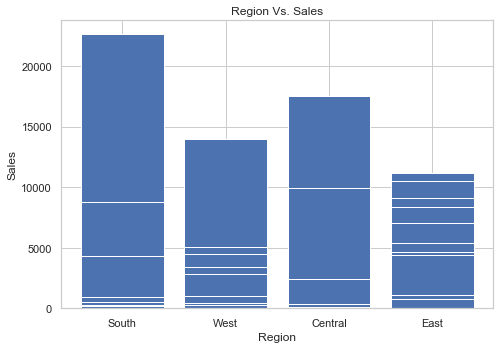

In [45]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(df["Region"],df["Sales"])
plt.title("Region Vs. Sales")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

South Region os leading the Sales Followed by Central,West and East Region

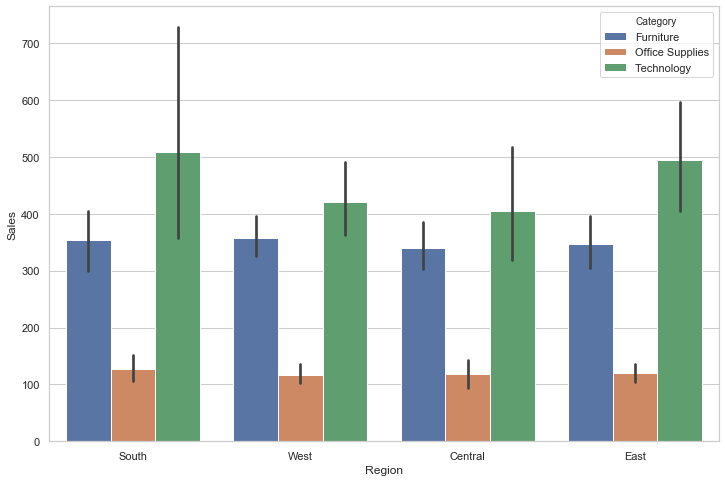

In [46]:
#Category wise Sales in Each region
plt.figure(figsize=[12,8])
ax=sns.barplot(x="Region",y="Sales",hue="Category",data=df)

Sales for Office Supplies are poor but for Tecnology and Furniture are good enough

<Figure size 864x576 with 0 Axes>

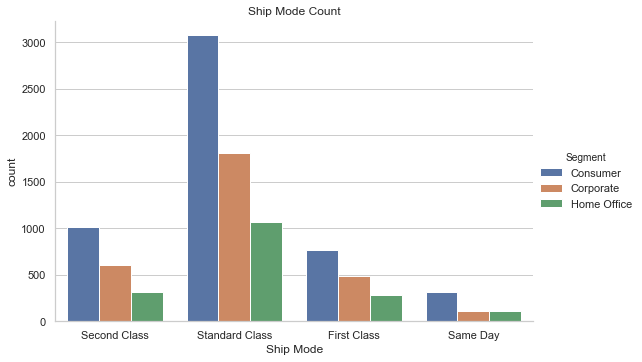

In [47]:
#Aspect wise count of ship Modes
plt.figure(figsize=[12,8])
sns.catplot(x="Ship Mode",hue="Segment",data=df,kind="count",aspect=1.5)
plt.title("Ship Mode Count")
plt.show()

Consumer Count is high in each case and they generally prefer Standard Class

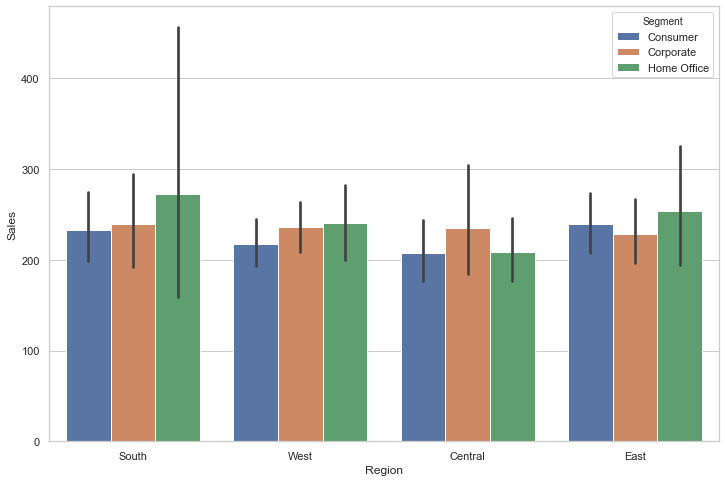

In [48]:
#Segment wise sales in each region
plt.figure(figsize=[12,8])
ax=sns.barplot(x="Region",y="Sales",hue="Segment",data=df)

Not much difference in Segments for any Region

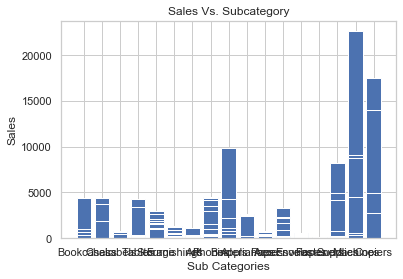

In [49]:
#Sales Vs. Subcategory
plt.bar("Sub-Category","Sales",data=df)
plt.xlabel("Sub Categories")
plt.ylabel("Sales")
plt.title("Sales Vs. Subcategory")
plt.show()

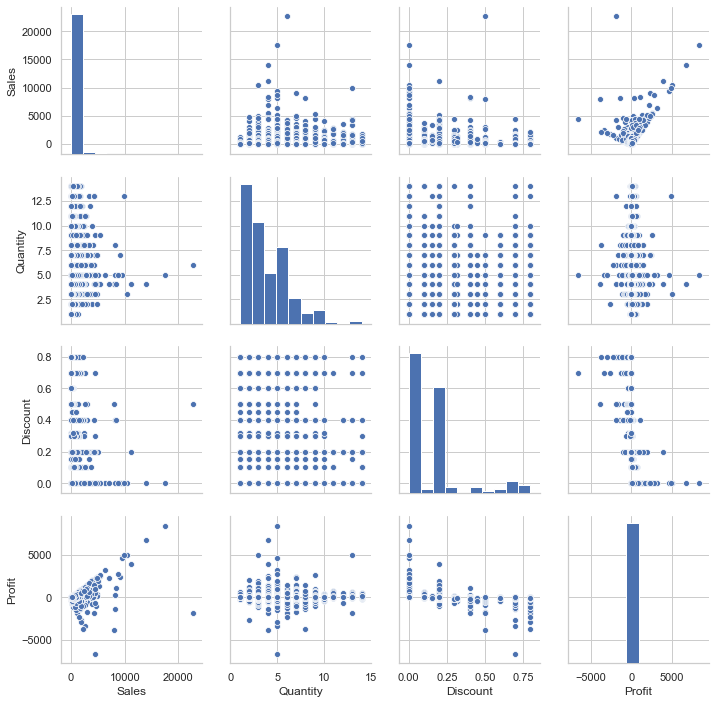

In [51]:
sns.pairplot(df)

In [52]:
# data with high sales
high_sale_data=df[df["Sales"]>3000]
high_sale_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,San Antonio,Texas,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
251,Standard Class,Consumer,San Diego,California,West,Technology,Accessories,3347.370,13,0.0,636.0003
262,Second Class,Corporate,Houston,Texas,Central,Technology,Machines,3059.982,3,0.4,-509.9970
318,Standard Class,Home Office,New York City,New York,East,Technology,Machines,3991.980,2,0.0,1995.9900


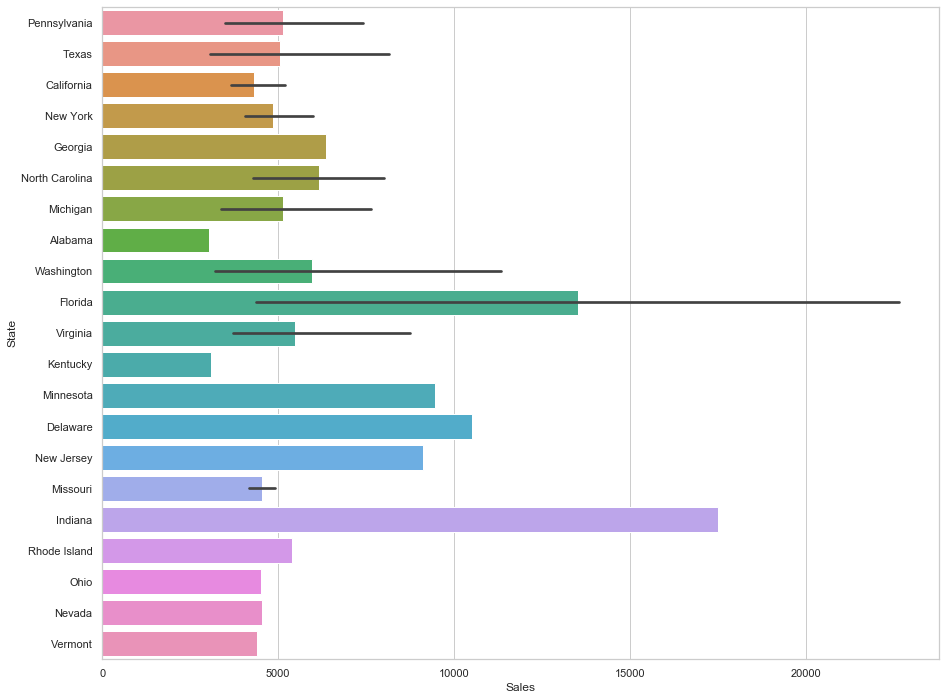

In [53]:
#Columns having High Sales
plt.figure(figsize=(15,12))
ax=sns.barplot(x=high_sale_data["Sales"],y=high_sale_data["State"],data=df)

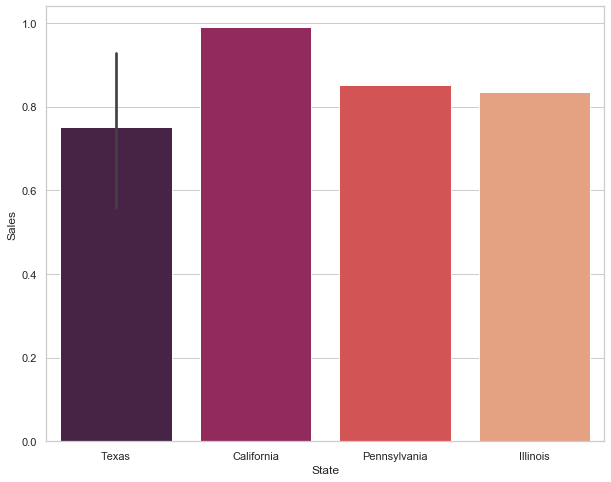

In [54]:
#States with loweset Sales Data
plt.figure(figsize=(10,8))
low_sale_data=df[df["Sales"]<1]
sns.barplot(x=low_sale_data["State"],y=low_sale_data["Sales"],data=low_sale_data,palette='rocket')

Sales and Profit are high Positively Correlated whereas Profit and Discount are Negatively Correlated

## Thank You